Linear discriminant analysis is a method you can use when you have a set of predictor variables and you’d like to classify a response variable into two or more classes.

In [1]:
library(MASS)
library(ggplot2)

In [8]:
#attach iris dataset to make it easy to work with
attach(iris)

#view structure of dataset
str(iris)



'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


We can see that the dataset contains 5 variables and 150 total observations.
For this example we’ll build a linear discriminant analysis model to classify which species a given flower belongs to.

We’ll use the following predictor variables in the model:

Sepal.length
Sepal.Width
Petal.Length
Petal.Width
And we’ll use them to predict the response variable Species, which takes on the following three potential classes:

setosa
versicolor
virginica

One of the key assumptions of linear discriminant analysis is that each of the predictor variables have the same variance. An easy way to assure that this assumption is met is to scale each variable such that it has a mean of 0 and a standard deviation of 1.

In [10]:
#scale each predictor variable (i.e. first 4 columns)
iris[1:4] <- scale(iris[1:4])

We can use the apply() function to verify that each predictor variable now has a mean of 0 and a standard deviation of 1:

In [11]:
#find mean of each predictor variable
apply(iris[1:4], 2, mean)


Sepal.Length   Sepal.Width  Petal.Length   Petal.Width 
-3.807040e-18 -4.916405e-18 -1.610763e-17 -2.216218e-17

In [12]:
#find standard deviation of each predictor variable
apply(iris[1:4], 2, sd) 


Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
           1            1            1            1

Next, we’ll split the dataset into a training set to train the model on and a testing set to test the model on

In [13]:
#make this example reproducible
set.seed(1)

#Use 70% of dataset as training set and remaining 30% as testing set
sample <- sample(c(TRUE, FALSE), nrow(iris), replace=TRUE, prob=c(0.7,0.3))
train <- iris[sample, ]
test <- iris[!sample, ] 

Next, we’ll use the lda() function from the MASS package to fit the LDA model to our data:

In [14]:
#fit LDA model
model <- lda(Species~., data=train)

#view model output
model

Call:
lda(Species ~ ., data = train)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3207547  0.3207547  0.3584906 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa       -1.0397484   0.8131654   -1.2891006  -1.2570316
versicolor    0.1820921  -0.6038909    0.3403524   0.2208153
virginica     0.9582674  -0.1919146    1.0389776   1.1229172

Coefficients of linear discriminants:
                    LD1        LD2
Sepal.Length  0.7922820  0.5294210
Sepal.Width   0.5710586  0.7130743
Petal.Length -4.0762061 -2.7305131
Petal.Width  -2.0602181  2.6326229

Proportion of trace:
   LD1    LD2 
0.9921 0.0079 

Here is how to interpret the output of the model:

Prior probabilities of group: These represent the proportions of each Species in the training set. For example, 35.8% of all observations in the training set were of species virginica.

Group means: These display the mean values for each predictor variable for each species.

Coefficients of linear discriminants: These display the linear combination of predictor variables that are used to form the decision rule of the LDA model. For example:

LD1: .792*Sepal.Length + .571*Sepal.Width – 4.076*Petal.Length – 2.06*Petal.Width
LD2: .529*Sepal.Length + .713*Sepal.Width – 2.731*Petal.Length + 2.63*Petal.Width
Proportion of trace: These display the percentage separation achieved by each linear discriminant function.

Once we’ve fit the model using our training data, we can use it to make predictions on our test data:

In [15]:
#use LDA model to make predictions on test data
predicted <- predict(model, test)

names(predicted)

[1] "class"     "posterior" "x"

This returns a list with three variables:

class: The predicted class
posterior: The posterior probability that an observation belongs to each class
x: The linear discriminants

We can quickly view each of these results for the first six observations in our test dataset:

In [16]:
#view predicted class for first six observations in test set
head(predicted$class)

[1] setosa setosa setosa setosa setosa setosa
Levels: setosa versicolor virginica

In [17]:
#view posterior probabilities for first six observations in test set
head(predicted$posterior)


,setosa,versicolor,virginica
4,1,2.425563e-17,1.341984e-35
6,1,1.400976e-21,4.482684e-40
7,1,3.345770e-19,1.511748e-37
15,1,6.389105e-31,7.361660e-53
17,1,1.193282e-25,2.238696e-45
18,1,6.445594e-22,4.894053e-41


In [18]:
#view linear discriminants for first six observations in test set
head(predicted$x)


,LD1,LD2
4,7.150360,-0.7177382
6,7.961538,1.4839408
7,7.504033,0.2731178
15,10.170378,1.9859027
17,8.885168,2.1026494
18,8.113443,0.7563902


We can use the following code to see what percentage of observations the LDA model correctly predicted the Species for:

In [19]:
#find accuracy of model
mean(predicted$class==test$Species)


[1] 1

It turns out that the model correctly predicted the Species for 100% of the observations in our test dataset.

In the real-world an LDA model will rarely predict every class outcome correctly, but this iris dataset is simply built in a way that machine learning algorithms tend to perform very well on it.



Lastly, we can create an LDA plot to view the linear discriminants of the model and visualize how well it separated the three different species in our dataset:

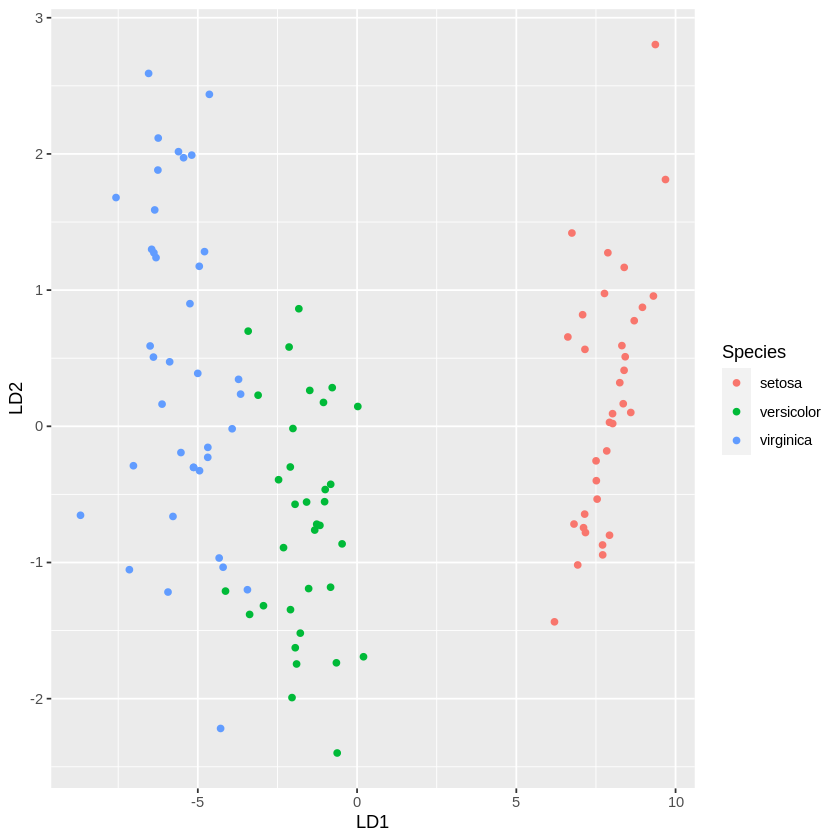

In [20]:
#define data to plot
lda_plot <- cbind(train, predict(model)$x)

#create plot
ggplot(lda_plot, aes(LD1, LD2)) +
  geom_point(aes(color = Species))